In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
sns.set_style()

In [2]:
from datetime import datetime
from dateutil import parser
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [37]:
df=pd.read_csv('Dataset 3.csv')
df

,Date,dewPoint,fog,hail,humidity,pressure,rain,maximumTemp,thunder,averageWindSpeed,maxWindSpeed
0,01-11-96,11.666667,0.000,0.0,52.916667,-2659.666667,0.0,22.333333,0.0,0.616667,7.4
1,02-11-96,10.458333,0.000,0.0,48.625000,1009.833333,0.0,22.916667,0.0,7.025000,22.2
2,03-11-96,12.041667,0.000,0.0,55.958333,1010.500000,0.0,21.791667,0.0,4.404167,24.1
3,04-11-96,10.222222,0.000,0.0,48.055556,1011.333333,0.0,22.722222,0.0,1.855556,11.1
4,05-11-96,8.200000,0.000,0.0,29.400000,1011.800000,0.0,27.800000,0.0,10.020000,14.8
...,...,...,...,...,...,...,...,...,...,...,...
6854,27-12-15,9.500000,0.250,0.0,63.250000,1020.625000,0.0,15.375000,0.0,7.887500,11.1
6855,28-12-15,10.250000,0.000,0.0,58.125000,1020.875000,0.0,17.125000,0.0,10.887500,18.5
6856,29-12-15,10.875000,0.125,0.0,65.000000,1018.125000,0.0,16.375000,0.0,7.412500,14.8
6857,30-12-15,10.625000,0.375,0.0,71.750000,1017.500000,0.0,15.500000,0.0,2.100000,5.6


In [42]:
df2016=pd.read_csv('Dataset 5.csv')
df2016

,Date,dewPoint,fog,hail,humidity,pressure,rain,maximumTemp,thunder,averageWindSpeed,maxWindSpeed
0,01-01-16,10.000000,0.428571,0,72.285714,1021.142857,0.0,14.714286,0.0,1.057143,3.7
1,02-01-16,10.000000,0.375000,0,75.875000,1021.000000,0.0,14.000000,0.0,2.087500,11.1
2,03-01-16,10.500000,0.375000,0,74.750000,1018.500000,0.0,14.375000,0.0,5.112500,13.0
3,04-01-16,12.125000,0.500000,0,77.125000,1017.625000,0.0,15.750000,0.0,0.000000,0.0
4,05-01-16,14.000000,0.666667,0,88.833333,1017.000000,0.0,15.833333,0.0,0.616667,3.7
...,...,...,...,...,...,...,...,...,...,...,...
361,27-12-16,10.450000,0.250000,0,67.550000,1017.200000,0.0,16.850000,0.0,8.335000,18.5
362,28-12-16,10.521739,0.260870,0,68.043478,1015.565217,0.0,17.217391,0.0,3.547826,11.1
363,29-12-16,13.285714,0.761905,0,87.857143,1016.904762,0.0,15.238095,0.0,6.000000,11.1
364,30-12-16,12.523810,0.476190,0,89.666667,1017.904762,0.0,14.095238,0.0,6.266667,14.8


In [39]:
dfMaxTemp=df[['Date','maximumTemp']]
print(dfMaxTemp.iloc[6858,0])

31-12-15


In [45]:
dfMonthlyMaxTemp = pd.DataFrame(columns=['date','maximumTemp'])
date=df2016.iloc[0,0][3:]
tempDate=df2016.iloc[0,0][3:]
i=0
count=0
avgTemp=0
while(i<365):
    if(tempDate==date):
        avgTemp+=df2016.iloc[i,1]
        i+=1
        count+=1
        if(i==365):
            avgTemp/=count
            tempDf=pd.DataFrame([{'date':date,'maximumTemp':avgTemp}])
            dfMonthlyMaxTemp=pd.concat([dfMonthlyMaxTemp,tempDf],ignore_index=True,axis=0)
            break
        tempDate=df2016.iloc[i,0]
        tempDate=tempDate[3:]
    else:
        avgTemp/=count
        tempDf=pd.DataFrame([{'date':date,'maximumTemp':avgTemp}])
        dfMonthlyMaxTemp=pd.concat([dfMonthlyMaxTemp,tempDf],ignore_index=True,axis=0)
        count=0
        avgTemp=0
        if(i>=365):
            break
        date=df2016.iloc[i,0]
        date=date[3:]

/var/folders/73/1fbt52l13hl2_rtlv49ngykr0000gn/T/ipykernel_62613/3903123215.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfMonthlyMaxTemp=pd.concat([dfMonthlyMaxTemp,tempDf],ignore_index=True,axis=0)


In [46]:
dfMonthlyMaxTemp
dfMonthlyMaxTemp.to_csv("Monthly 2016.csv")

In [5]:
dfMaxTemp['Date']=pd.to_datetime(dfMaxTemp['Date'],dayfirst=True)
dfMaxTemp=dfMaxTemp.set_index(['Date'])
dfMaxTemp

/var/folders/73/1fbt52l13hl2_rtlv49ngykr0000gn/T/ipykernel_51388/1693794078.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfMaxTemp['Date']=pd.to_datetime(dfMaxTemp['Date'],dayfirst=True)
/var/folders/73/1fbt52l13hl2_rtlv49ngykr0000gn/T/ipykernel_51388/1693794078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMaxTemp['Date']=pd.to_datetime(dfMaxTemp['Date'],dayfirst=True)


,maximumTemp
Date,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000
...,...
2016-12-27,16.850000
2016-12-28,17.217391
2016-12-29,15.238095


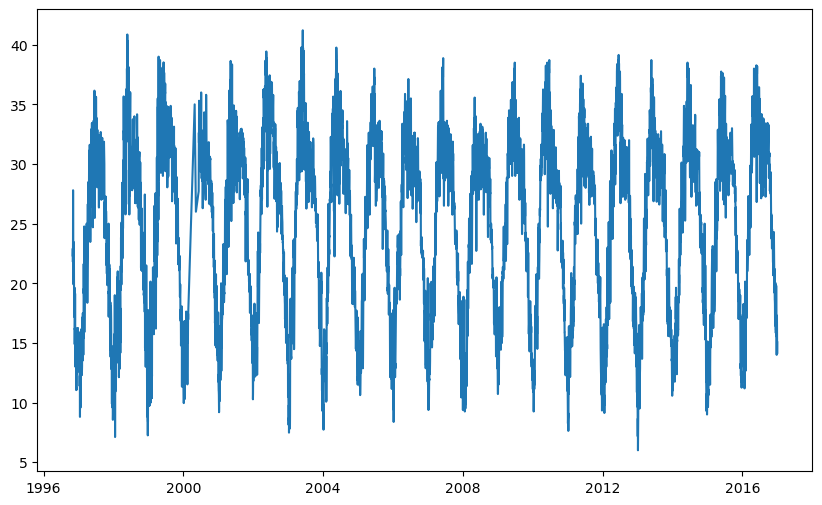

In [6]:
dfMaxTemp_log=np.log(dfMaxTemp)
plt.plot(dfMaxTemp)

            maximumTemp
Date                   
1996-11-01          NaN
1996-11-02          NaN
1996-11-03          NaN
1996-11-04          NaN
1996-11-05          NaN
...                 ...
2016-12-27     2.903965
2016-12-28     2.895112
2016-12-29     2.883465
2016-12-30     2.872020
2016-12-31     2.862967

[7225 rows x 1 columns]
            maximumTemp
Date                   
1996-11-01          NaN
1996-11-02          NaN
1996-11-03          NaN
1996-11-04          NaN
1996-11-05          NaN
...                 ...
2016-12-27     0.103098
2016-12-28     0.095809
2016-12-29     0.094643
2016-12-30     0.101899
2016-12-31     0.103734

[7225 rows x 1 columns]


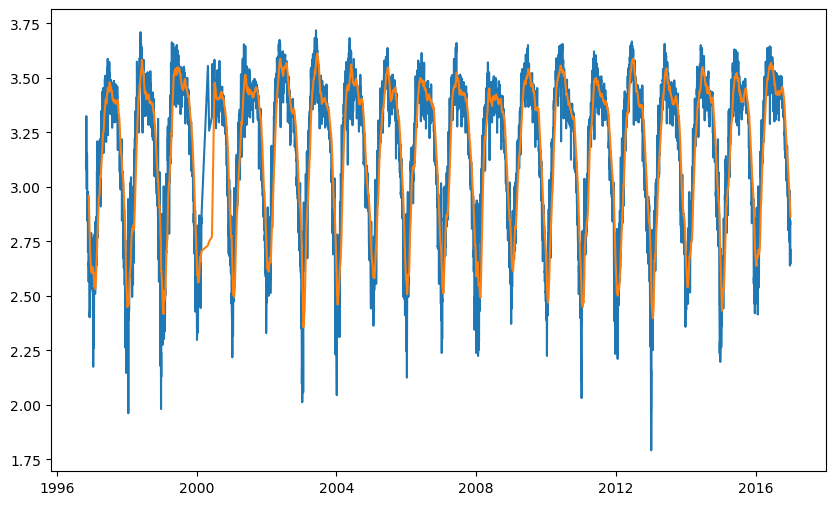

In [7]:
rollingMean=dfMaxTemp_log.rolling(window=30).mean()
rollingStd=dfMaxTemp_log.rolling(window=30).std()
print(rollingMean)
print(rollingStd)
plt.plot(dfMaxTemp_log)
plt.plot(rollingMean)
plt.show()

In [8]:
dfMaxTemp_logMinus = dfMaxTemp_log - rollingMean
dfMaxTemp_logMinus.dropna(inplace=True)

In [9]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['maximumTemp'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

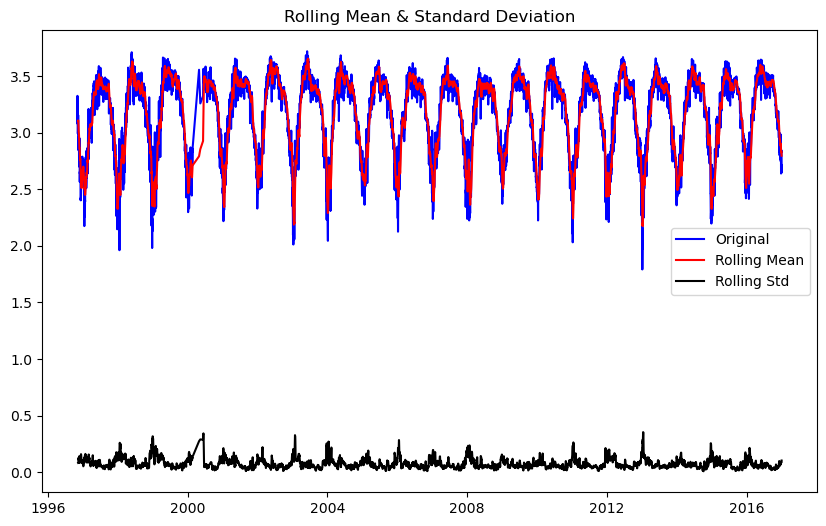

Results of Dickey Fuller Test:
Test Statistic                -7.187603e+00
p-value                        2.552640e-10
#Lags Used                     3.500000e+01
Number of Observations Used    7.189000e+03
Critical Value (1%)           -3.431260e+00
Critical Value (5%)           -2.861942e+00
Critical Value (10%)          -2.566984e+00
dtype: float64


In [10]:
test_stationarity(dfMaxTemp_log)

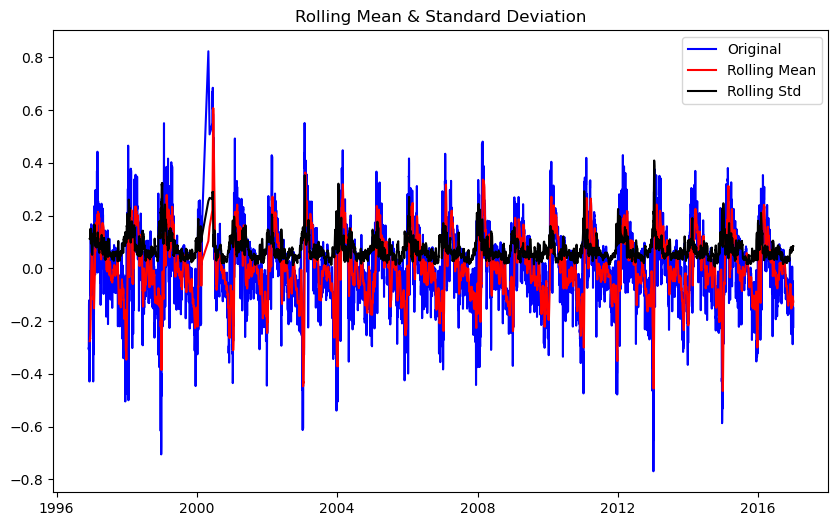

Results of Dickey Fuller Test:
Test Statistic                -8.113439e+00
p-value                        1.208567e-12
#Lags Used                     3.200000e+01
Number of Observations Used    7.163000e+03
Critical Value (1%)           -3.431263e+00
Critical Value (5%)           -2.861944e+00
Critical Value (10%)          -2.566985e+00
dtype: float64


In [11]:
test_stationarity(dfMaxTemp_logMinus)

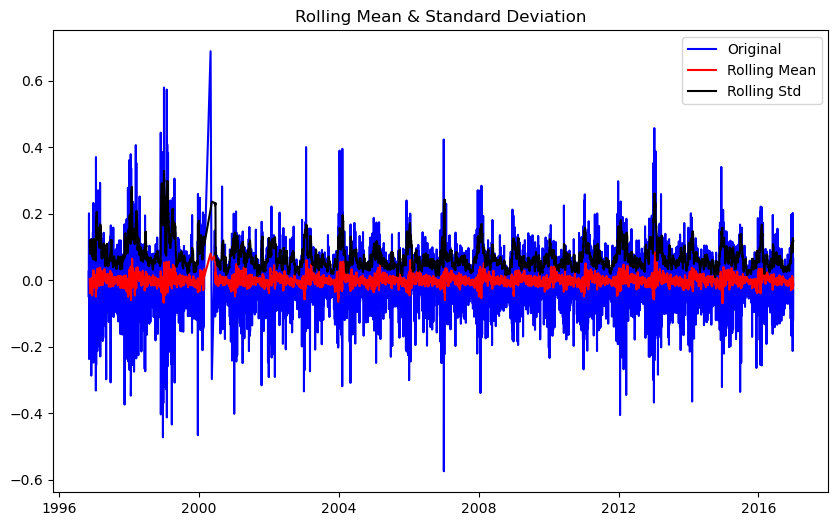

Results of Dickey Fuller Test:
Test Statistic                -1.256809e+01
p-value                        2.032410e-23
#Lags Used                     3.300000e+01
Number of Observations Used    7.190000e+03
Critical Value (1%)           -3.431260e+00
Critical Value (5%)           -2.861942e+00
Critical Value (10%)          -2.566984e+00
dtype: float64


In [12]:
dfMaxTemp_logShifted = dfMaxTemp_log - dfMaxTemp_log.shift()
dfMaxTemp_logShifted.dropna(inplace=True)
test_stationarity(dfMaxTemp_logShifted)

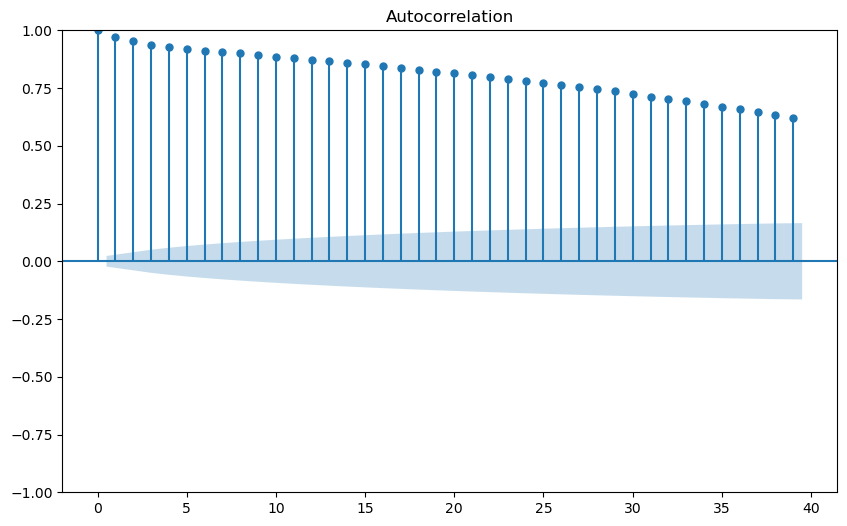

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dfMaxTemp_log)
plt.show()

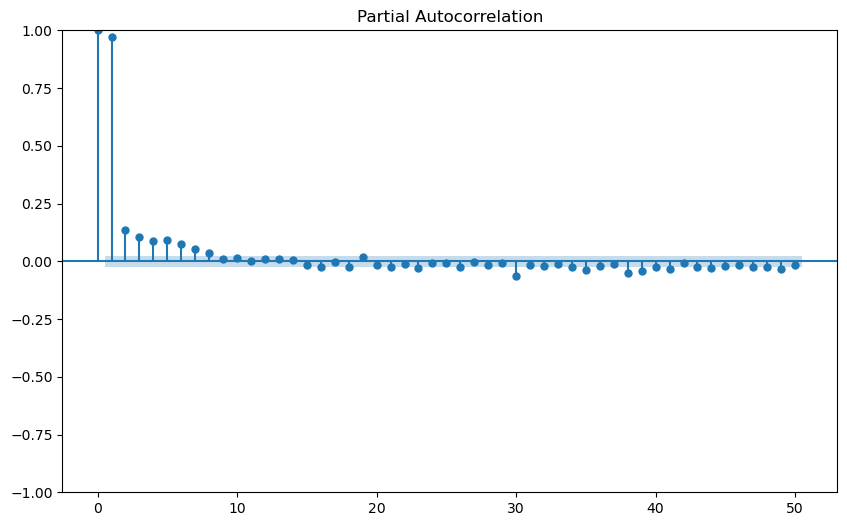

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dfMaxTemp_log, lags=50)
plt.show()

/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Plotting AR model


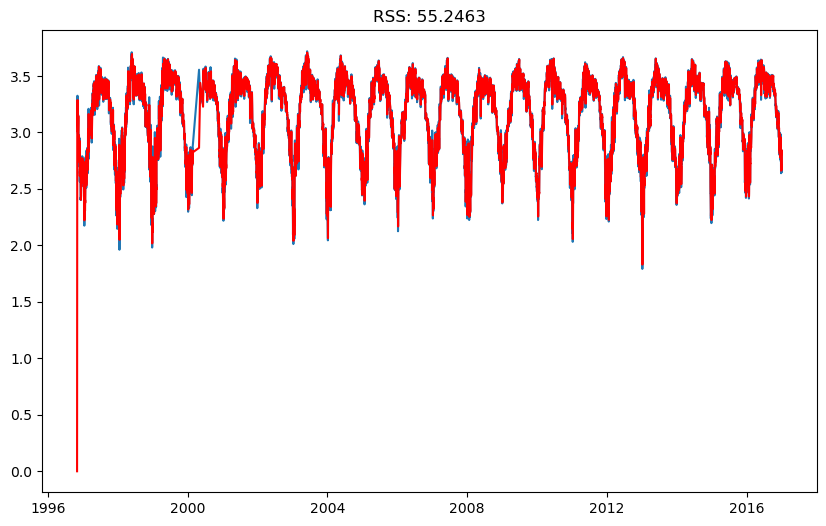

In [15]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(dfMaxTemp_log, order=(2,1,0))
results_AR = model.fit()
plt.plot(dfMaxTemp_log)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - dfMaxTemp_log['maximumTemp'])**2))
print('Plotting AR model')

/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Plotting MA model


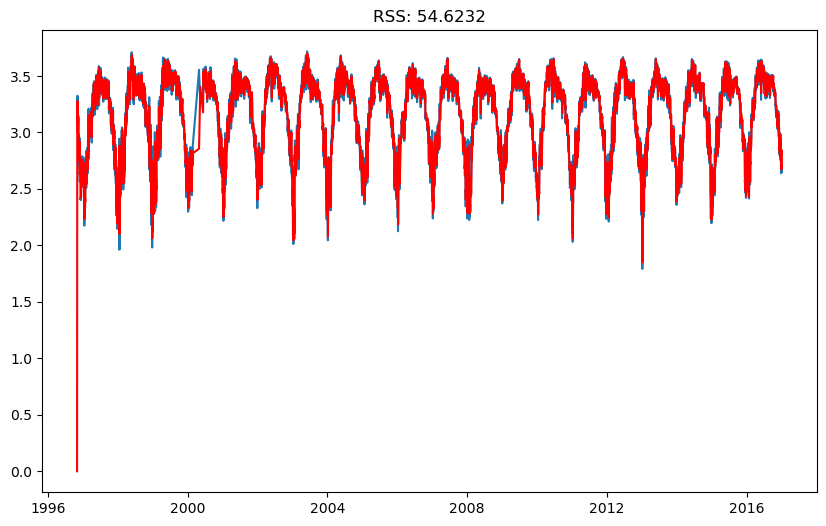

In [16]:
model = ARIMA(dfMaxTemp_log, order=(0,1,2))
results_MA = model.fit()
plt.plot(dfMaxTemp_log)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - dfMaxTemp_log['maximumTemp'])**2))
print('Plotting MA model')

/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Plotting ARIMA model


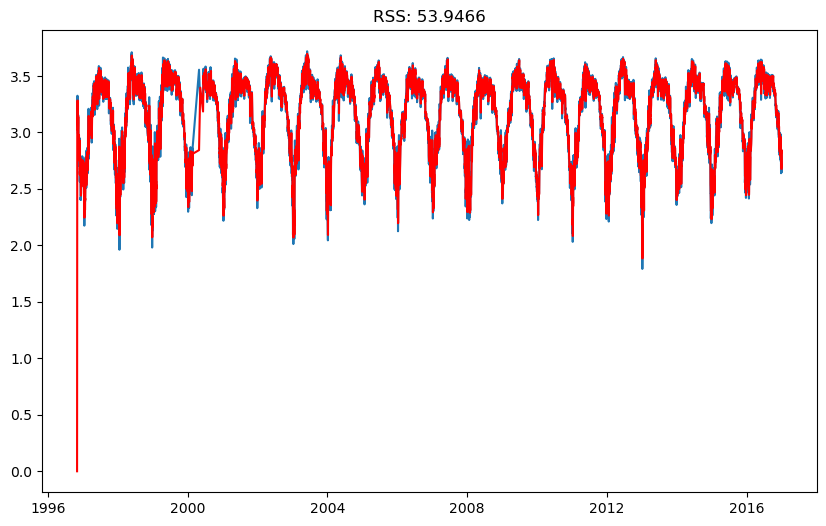

In [17]:
model = ARIMA(dfMaxTemp_log, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(dfMaxTemp_log)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - dfMaxTemp_log['maximumTemp'])**2))
print('Plotting ARIMA model')

In [18]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff=predictions_ARIMA_diff.shift(-1)
predictions_ARIMA_diff[-1]=2.719221

/var/folders/73/1fbt52l13hl2_rtlv49ngykr0000gn/T/ipykernel_51388/2589216811.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  predictions_ARIMA_diff[-1]=2.719221


In [19]:
dfMaxTemp_log

,maximumTemp
Date,
1996-11-01,3.106080
1996-11-02,3.131864
1996-11-03,3.081528
1996-11-04,3.123343
1996-11-05,3.325036
...,...
2016-12-27,2.824351
2016-12-28,2.845920
2016-12-29,2.723799


In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dfMaxTemp_log,predictions_ARIMA_diff)
mse

0.0004047624852931397

In [21]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Date
1996-11-01        3.106080
1996-11-02        6.233987
1996-11-03        9.320912
1996-11-04       12.441422
1996-11-05       15.724557
                  ...     
2016-12-27    22900.522047
2016-12-28    22903.363272
2016-12-29    22906.106492
2016-12-30    22908.785963
2016-12-31    22911.505184
Length: 7225, dtype: float64


In [22]:
predictions_ARIMA_log = pd.Series(dfMaxTemp_log['maximumTemp'].iloc[0], index=dfMaxTemp.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log

Date
1996-11-01        6.212161
1996-11-02        9.340067
1996-11-03       12.426992
1996-11-04       15.547503
1996-11-05       18.830637
                  ...     
2016-12-27    22903.628128
2016-12-28    22906.469352
2016-12-29    22909.212572
2016-12-30    22911.892043
2016-12-31    22914.611264
Length: 7225, dtype: float64

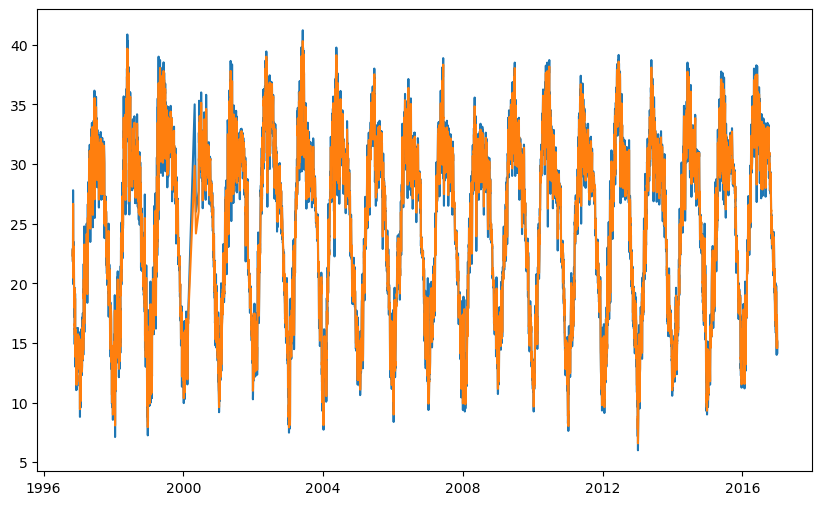

In [23]:
predictions_ARIMA = np.exp(predictions_ARIMA_diff)
plt.plot(dfMaxTemp)
plt.plot(predictions_ARIMA)

In [24]:
predictions_ARIMA

Date
1996-11-01    22.333333
1996-11-02    22.826143
1996-11-03    21.909607
1996-11-04    22.657940
1996-11-05    26.659197
                ...    
2016-12-27    16.787099
2016-12-28    17.136737
2016-12-29    15.536931
2016-12-30    14.577386
2016-12-31    15.168501
Length: 7225, dtype: float64

In [25]:
dfMaxTemp

,maximumTemp
Date,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000
...,...
2016-12-27,16.850000
2016-12-28,17.217391
2016-12-29,15.238095


In [26]:
results_ARIMA.forecast(300)

/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


7225    2.724309
7226    2.731281
7227    2.735513
7228    2.737836
7229    2.739240
          ...   
7520    2.741098
7521    2.741098
7522    2.741098
7523    2.741098
7524    2.741098
Name: predicted_mean, Length: 300, dtype: float64

In [27]:
model = SARIMAX(dfMaxTemp_log, order=(2,1,2))
results_SARIMA = model.fit()
plt.plot(dfMaxTemp_log)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - dfMaxTemp_log['maximumTemp'])**2))
print('Plotting ARIMA model')

NameError: name 'SARIMAX' is not defined

In [ ]:
import itertools
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 365) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dfMaxTemp_log, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 365)
SARIMAX: (0, 1, 1) x (0, 1, 2, 365)
SARIMAX: (0, 1, 2) x (1, 1, 0, 365)
SARIMAX: (0, 1, 2) x (1, 1, 1, 365)


/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.09941D-01    |proj g|=  4.54535D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      6      1     0     0   6.308D-06  -7.106D-01
  F = -0.71059676597756760     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
